1\. **Pandas DataFrame**

This exercise consists in analyzing a dataset containg timing information from a series of Time-to-Digital-Converters (TDC) implemented in a pair of FPGAs. Each measurement (i.e. each row of the input file) consists of a flag that specifies the type of message ('HEAD', which in this case is always 1), two addresses of the TDC providing the signal ('FPGA' and 'TDC_CHANNEL'), and the timing information ('ORBIT_CNT', 'BX_COUNTER', and 'TDC_MEAS'). Each TDC count corresponds to 25/30 ns, whereas a unit of BX_COUNTER corresponds to 25 ns, and the ORBIT_CNT is increased every `x` BX_COUNTER. This allows to store the time in a similar way to hours, minutes and seconds.

In [5]:
# If haven't downloaded it yet, please get the data file with wget
!wget https://www.dropbox.com/s/xvjzaxzz3ysphme/data_000637.txt -P ./data/

--2022-12-02 22:28:35--  https://www.dropbox.com/s/xvjzaxzz3ysphme/data_000637.txt
Resolving www.dropbox.com (www.dropbox.com)... 162.125.69.18
Connecting to www.dropbox.com (www.dropbox.com)|162.125.69.18|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: /s/raw/xvjzaxzz3ysphme/data_000637.txt [following]
--2022-12-02 22:28:35--  https://www.dropbox.com/s/raw/xvjzaxzz3ysphme/data_000637.txt
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://ucaa447f10041362eb8a3bc85f54.dl.dropboxusercontent.com/cd/0/inline/Bx5rWs_rAVYJbvcUr7Q97b3PTxC9nJH3mifcaR0nYS4CgUL_nJOhEd6zqqNDAf7RR0UbYMmn3YQlIdZstgEj2l80TZCL8NifAEnrv-UlzCl4ynogvnQ4jcT6OHoQOawJDjCIYUJrwByGDuM8zmMDo0-B2bghKFAlG9gvp6BhXeJy7Q/file# [following]
--2022-12-02 22:28:36--  https://ucaa447f10041362eb8a3bc85f54.dl.dropboxusercontent.com/cd/0/inline/Bx5rWs_rAVYJbvcUr7Q97b3PTxC9nJH3mifcaR0nYS4CgUL_nJOhEd6zqqNDAf7RR0UbYMmn3YQlIdZstgEj2l80TZCL8NifA

1\. Create a Pandas DataFrame reading N rows of the `data/data_000637.txt` dataset. Choose N to be smaller than or equal to the maximum number of rows and larger than 10k (check the documentation).

In [6]:
import pandas as pd # standard naming convention
import numpy as np
df = pd.read_csv('./data/data_000637.txt')
df = pd.DataFrame(df)

def load_data(df,N):
    print("1.Create a Pandas DataFrame reading N rows of the `data/data_000637.txt` dataset")
    print("Print the first 5 rows of the DataFrame")
    print(df.head(5))
    max_length = len(df)
    print('Print all the rows of the DataFrame')
    print(df.head(max_length))
    print('Print the 19999 rows of the DataFrame')
    print(df.head(19999))

load_data(df,N=5)


1.Create a Pandas DataFrame reading N rows of the `data/data_000637.txt` dataset
Print the first 5 rows of the DataFrame
   HEAD  FPGA  TDC_CHANNEL   ORBIT_CNT  BX_COUNTER  TDC_MEAS
0     1     0          123  3869200167        2374        26
1     1     0          124  3869200167        2374        27
2     1     0           63  3869200167        2553        28
3     1     0           64  3869200167        2558        19
4     1     0           64  3869200167        2760        25
Print all the rows of the DataFrame
         HEAD  FPGA  TDC_CHANNEL   ORBIT_CNT  BX_COUNTER  TDC_MEAS
0           1     0          123  3869200167        2374        26
1           1     0          124  3869200167        2374        27
2           1     0           63  3869200167        2553        28
3           1     0           64  3869200167        2558        19
4           1     0           64  3869200167        2760        25
...       ...   ...          ...         ...         ...       ...
1310715 

2\. Estimate the number of BX in a ORBIT (the value `x`).

*Hint*: check when the BX counter reaches the maximum value before being reset to 0.

In [7]:
def estimateNumberBX(df):
    print("2. Estimate the number of BX in a ORBIT, the value x")
    m = df.loc[df['BX_COUNTER']. idxmax()]
    #print(m)
    n = df.loc[df['BX_COUNTER']. idxmin()]
    #print(n)
    x = m.BX_COUNTER - n.BX_COUNTER + 1
    print('x value is:',x)

estimateNumberBX(df)

2. Estimate the number of BX in a ORBIT, the value x
x value is: 3564


3\. Create a new column with the absolute time in ns (as a combination of the other three columns with timing information) since the beginning of the data acquisition, and convert the new column to a Time Series.

In [9]:

def estimateNumberOrbit(df):

    print("3.Create a new column `absolute time` in ns, and convert the new column to a Time Series")
    #df.drop('ABSOLUTE TIME', inplace=True, axis=1)
    df.insert(6, "ABSOLUTE TIME",df['ORBIT_CNT'] * 3564 * 25 + df['BX_COUNTER'] * 25 + df['TDC_MEAS'] * 25 / 30)
    df['TIME SERIES'] = pd.to_datetime(df['ABSOLUTE TIME'], unit='ns')
    df.to_csv('absolute_time.csv', index=False)

estimateNumberOrbit(df)


   


3.Create a new column `absolute time` in ns, and convert the new column to a Time Series


In [ ]:
df2= pd.read_csv('absolute_time.csv')
df2 = pd.DataFrame(df2)
df2.head(15)

,HEAD,FPGA,TDC_CHANNEL,ORBIT_CNT,BX_COUNTER,TDC_MEAS,ABSOLUTE TIME,TIME SERIES
0,1,0,123,3869200167,2374,26,3.447457e+14,1970-01-04 23:45:45.734939071
1,1,0,124,3869200167,2374,27,3.447457e+14,1970-01-04 23:45:45.734939072
2,1,0,63,3869200167,2553,28,3.447457e+14,1970-01-04 23:45:45.734943548
3,1,0,64,3869200167,2558,19,3.447457e+14,1970-01-04 23:45:45.734943665
4,1,0,64,3869200167,2760,25,3.447457e+14,1970-01-04 23:45:45.734948720
5,1,0,63,3869200167,2762,4,3.447457e+14,1970-01-04 23:45:45.734948753
6,1,0,61,3869200167,2772,14,3.447457e+14,1970-01-04 23:45:45.734949011
7,1,0,139,3869200167,2776,0,3.447457e+14,1970-01-04 23:45:45.734949100
8,1,0,62,3869200167,2774,21,3.447457e+14,1970-01-04 23:45:45.734949067
9,1,0,60,3869200167,2788,7,3.447457e+14,1970-01-04 23:45:45.734949405


4\. Find out the duration of the data taking in hours, minutes and seconds, by using the features of the Time Series. Perform this check reading the whole dataset.

In [ ]:
def duration(df2):
    print("4. Estimate the duration of the data in seconds")
    max_length = len(df2)
    m = df2.loc[df2['ABSOLUTE TIME']. idxmax()]
    n = df2.loc[df2['ABSOLUTE TIME']. idxmin()]
    x = m['ABSOLUTE TIME'] - n['ABSOLUTE TIME']
    print('The duration of the run in seconds is:',x/1000000000)
    print('The duration of the run in minutes is:',x/1000000000/60)
    print('The duration of the run in hours is:',x/1000000000/60/60)

duration(df2)

4. Estimate the duration of the data in seconds
The duration of the run in seconds is: 0.9804162533125
The duration of the run in minutes is: 0.016340270888541668
The duration of the run in hours is: 0.00027233784814236113


5\. Use the `.groupby()` method to find out the noisy channels, i.e. the TDC channels with most counts (print to screen the top 3 and the corresponding counts)

In [ ]:
def noisyChannel(df2):
    print("5. Estimate the number of noisy channels")
    print('The number of noisy channels is:',len(df2['TDC_CHANNEL'].unique()))
    print('The top 3 noisy channels and their counts are:',df2['TDC_CHANNEL'].value_counts().head(3),sep='\n')
noisyChannel(df2)

5. Estimate the number of noisy channels
The number of noisy channels is: 133
The top 3 noisy channels and their counts are:
139    108059
64      66020
63      64642
Name: TDC_CHANNEL, dtype: int64


6\. Count the number of non-empty orbits (i.e. the number of orbits with at least one hit).

In [ ]:
def numberOfNonEmptyHits(df2):
    print("6. Count the number of non-empty hits")
    m = len(df2['ORBIT_CNT'].unique())
    print('The number of non-empty hits is:',m)


numberOfNonEmptyHits(df2)

6. Count the number of non-empty hits
The number of non-empty hits is: 11001


7\. Count the number of unique orbits with at least one measurement from TDC_CHANNEL=139.

In [ ]:
def numberOfUniqueOrbits(df2):
    print("7. Count the number of unique orbits")
    mask = ((df2['TDC_CHANNEL'] == 139) & (~df2['ORBIT_CNT'].duplicated()))
    print('The number of unique orbits is:',df[mask].size)



numberOfUniqueOrbits(df2)


    

7. Count the number of unique orbits
The number of unique orbits is: 1624


8\. Create two Series (one for each FPGA) that have the TDC channel as index, and the number of counts for the corresponding TDC channel as values.

8. Create two Series, one for each FPGA with the TDC channel as index, and one with number of counts for the corresponding TDC channel as values
The first series is (FPGA equals to 0):
139    75617
64     64581
63     63724
61     48699
62     48275
       ...  
130       33
137       32
30         4
129        2
39         1
Name: TDC_CHANNEL, Length: 124, dtype: int64
The second series is (FPGA equals to 1):
2      32669
139    32442
1      28438
4      26403
3      21970
       ...  
9         80
130       38
138       36
137       36
129       35
Name: TDC_CHANNEL, Length: 132, dtype: int64


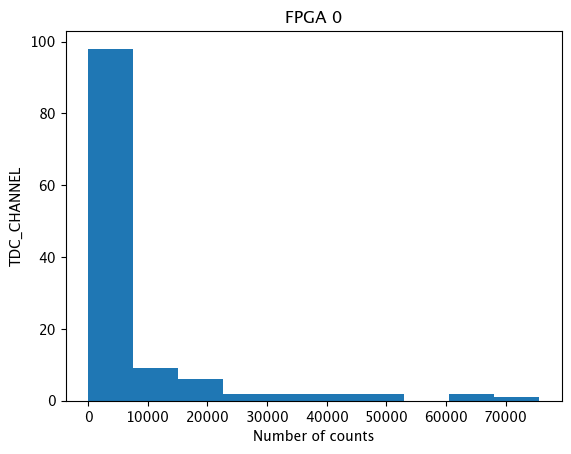

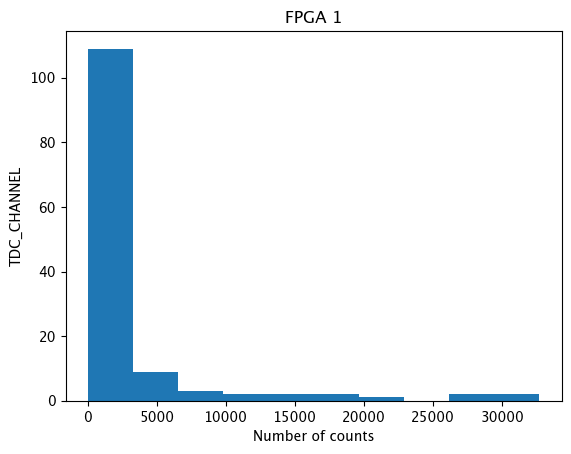

In [ ]:
import matplotlib.pyplot as plt

def twoSeries(df2):
    print("8. Create two Series, one for each FPGA with the TDC channel as index, and one with number of counts for the corresponding TDC channel as values")
    F0 = pd.Series(df2[df2['FPGA']==0]['TDC_CHANNEL'].value_counts())
    F1 = pd.Series(df2[df2['FPGA']==1]['TDC_CHANNEL'].value_counts())
    print('The first series is (FPGA equals to 0):',F0,sep='\n')
    print('The second series is (FPGA equals to 1):',F1,sep='\n')

    plt.hist(F0)
    plt.title('FPGA 0')
    plt.xlabel('Number of counts')
    plt.ylabel('TDC_CHANNEL')
    plt.show()
    
    print("\n")
    plt.hist(F1)
    plt.title('FPGA 1')
    plt.xlabel('Number of counts')
    plt.ylabel('TDC_CHANNEL')
    plt.show()

    

twoSeries(df2)

9\. **Optional:** Create two histograms (one for each FPGA) that show the number of counts for each TDC channel.